In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv(r'C:\Study\ML\BankNoteAuthentication.csv')

print("Данные подгружены")
print("Размер данных:", data.shape)

numeric_cols = ['variance', 'skewness', 'curtosis', 'entropy']
print("Числовые атрибуты:", numeric_cols)

Данные подгружены
Размер данных: (1372, 5)
Числовые атрибуты: ['variance', 'skewness', 'curtosis', 'entropy']


In [17]:
# 1. Описание датасета
print("\nОПИСАНИЕ ДАТАСЕТА")
print("Предметная область: Детекция поддельных банкнот")
print("Источник данных: https://www.kaggle.com/datasets/shantanuss/banknote-authentication-uci")
print("Характер данных: Реальные характеристики изображений банкнот, полученные методом вейвлет-преобразования")
print("")
print("Описание атрибутов:")
print("variance – дисперсия вейвлет-компонент (числовой)")
print("skewness – асимметрия распределения (числовой)")
print("curtosis – куртозис распределения (числовой)")
print("entropy – энтропия изображения (числовой)")
print("class – класс (0 – настоящая банкнота, 1 – поддельная)")
print("")
print("Задача анализа: бинарная классификация настоящих и поддельных банкнот")
print("Целевая переменная: class")
print("Основная цель: построение модели для автоматической проверки подлинности банкнот")
print("")
print("Контекст данных:")
print("- Характеристики получены из изображений банкнот методом вейвлет-преобразования")
print("- Для каждой банкноты вычислено 4 статистических параметра")
print("- Далее банкнота вручную промаркирована как подлинная или поддельная")
print("")
print("Дополнительная информация:")
classes = [int(c) for c in data['class'].unique()]
print("Количество классов:", len(classes))
print("Классы:", classes)
print("Общее количество записей:", len(data))


ОПИСАНИЕ ДАТАСЕТА
Предметная область: Детекция поддельных банкнот
Источник данных: https://www.kaggle.com/datasets/shantanuss/banknote-authentication-uci
Характер данных: Реальные характеристики изображений банкнот, полученные методом вейвлет-преобразования

Описание атрибутов:
variance – дисперсия вейвлет-компонент (числовой)
skewness – асимметрия распределения (числовой)
curtosis – куртозис распределения (числовой)
entropy – энтропия изображения (числовой)
class – класс (0 – настоящая банкнота, 1 – поддельная)

Задача анализа: бинарная классификация настоящих и поддельных банкнот
Целевая переменная: class
Основная цель: построение модели для автоматической проверки подлинности банкнот

Контекст данных:
- Характеристики получены из изображений банкнот методом вейвлет-преобразования
- Для каждой банкноты вычислено 4 статистических параметра
- Далее банкнота вручную промаркирована как подлинная или поддельная

Дополнительная информация:
Количество классов: 2
Классы: [0, 1]
Общее количе


СТАТИСТИЧЕСКИЙ АНАЛИЗ АТРИБУТОВ:

variance
Среднее: 0.43
СКО: 2.84
Пропуски: 0
Медиана: 0.5
Минимум: -7.04
Максимум: 6.82

skewness
Среднее: 1.92
СКО: 5.87
Пропуски: 0
Медиана: 2.32
Минимум: -13.77
Максимум: 12.95

curtosis
Среднее: 1.4
СКО: 4.31
Пропуски: 0
Медиана: 0.62
Минимум: -5.29
Максимум: 17.93

entropy
Среднее: -1.19
СКО: 2.1
Пропуски: 0
Медиана: -0.59
Минимум: -8.55
Максимум: 2.45


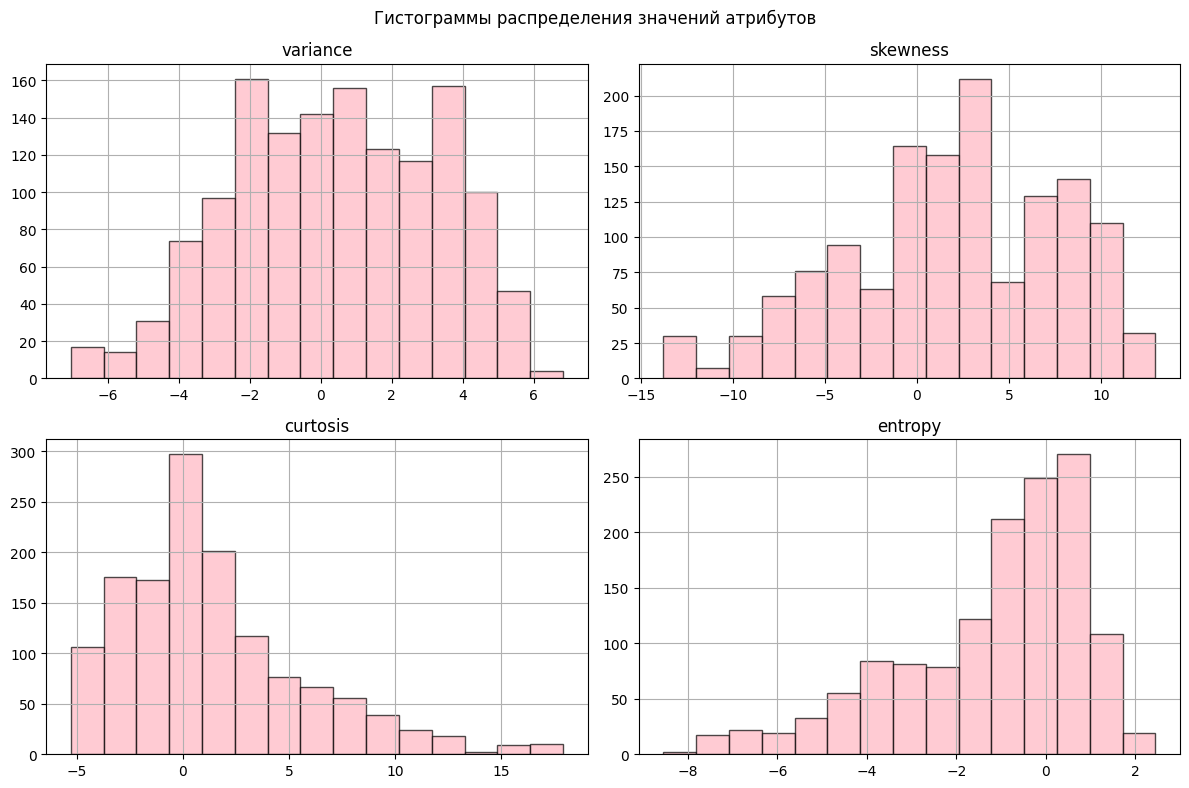

<Figure size 1200x600 with 0 Axes>

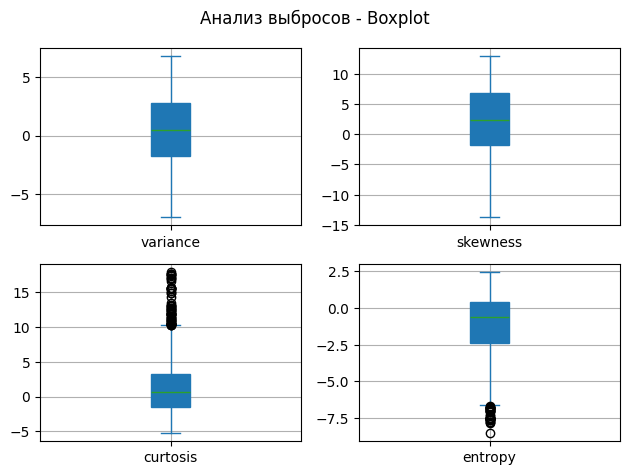


АНАЛИЗ ВЫБРОСОВ:
variance: 0 выбросов
skewness: 0 выбросов
curtosis: 59 выбросов
entropy: 33 выбросов

РЕКОМЕНДАЦИИ ПО ОБРАБОТКЕ:
Пропущенных значений нет — обработка не требуется
Выбросы присутствуют, но они связаны с реальными различиями банкнот
Рекомендуется оставить выбросы как есть


In [25]:
# 2. Статистический анализ атрибутов
print("\nСТАТИСТИЧЕСКИЙ АНАЛИЗ АТРИБУТОВ:")
for col in numeric_cols:
    print(f"\n{col}")
    print("Среднее:", round(data[col].mean(), 2))
    print("СКО:", round(data[col].std(), 2))
    print("Пропуски:", data[col].isnull().sum())
    print("Медиана:", round(data[col].median(), 2))
    print("Минимум:", round(data[col].min(), 2))
    print("Максимум:", round(data[col].max(), 2))

# 3. Гистограммы
data[numeric_cols].hist(bins=15, figsize=(12, 8), color='lightpink',
                       edgecolor='black', alpha=0.7)
plt.suptitle('Гистограммы распределения значений атрибутов')
plt.tight_layout()
plt.show()

# 4. Boxplot для поиска выбросов
plt.figure(figsize=(12, 6))
data[numeric_cols].plot(kind='box', subplots=True, layout=(2, 2),
                       grid=True, patch_artist=True)
plt.suptitle('Анализ выбросов - Boxplot')
plt.tight_layout()
plt.show()

# 5. Анализ выбросов
print("\nАНАЛИЗ ВЫБРОСОВ:")
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} выбросов")

print("\nРЕКОМЕНДАЦИИ ПО ОБРАБОТКЕ:")
print("Пропущенных значений нет — обработка не требуется")
print("Выбросы присутствуют, но они связаны с реальными различиями банкнот")
print("Рекомендуется оставить выбросы как есть")

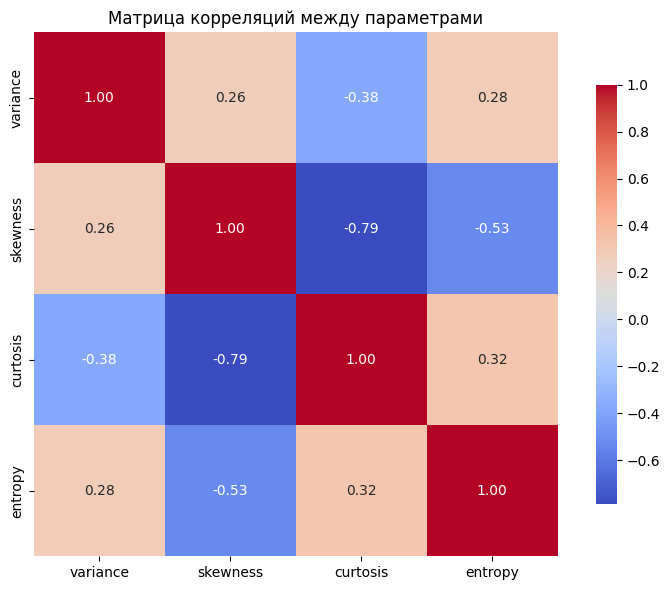


АНАЛИЗ КОРРЕЛЯЦИЙ:

ВЫСОКИЕ КОРРЕЛЯЦИИ (>0.7):
skewness - curtosis: -0.787 (отрицательная)

СЛАБЫЕ КОРРЕЛЯЦИИ (<0.3):
variance - skewness: 0.264
variance - entropy: 0.277


In [29]:
# 6. Корреляционный анализ
corr_matrix = data[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            square=True, cbar_kws={'shrink': 0.8})
plt.title('Матрица корреляций между параметрами')
plt.tight_layout()
plt.show()

# Высокие и низкие корреляции
print("\nАНАЛИЗ КОРРЕЛЯЦИЙ:")

print("\nВЫСОКИЕ КОРРЕЛЯЦИИ (>0.7):")
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))
            if corr_val > 0:
                print(f"{corr_matrix.columns[i]} - {corr_matrix.columns[j]}: {corr_val:.3f} (положительная)")
            else:
                print(f"{corr_matrix.columns[i]} - {corr_matrix.columns[j]}: {corr_val:.3f} (отрицательная)")

if len(high_corr) == 0:
    print("Нет сильных корреляций")

print("\nСЛАБЫЕ КОРРЕЛЯЦИИ (<0.3):")
low_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) < 0.3:
            print(f"{corr_matrix.columns[i]} - {corr_matrix.columns[j]}: {corr_val:.3f}")


МАТРИЦА:


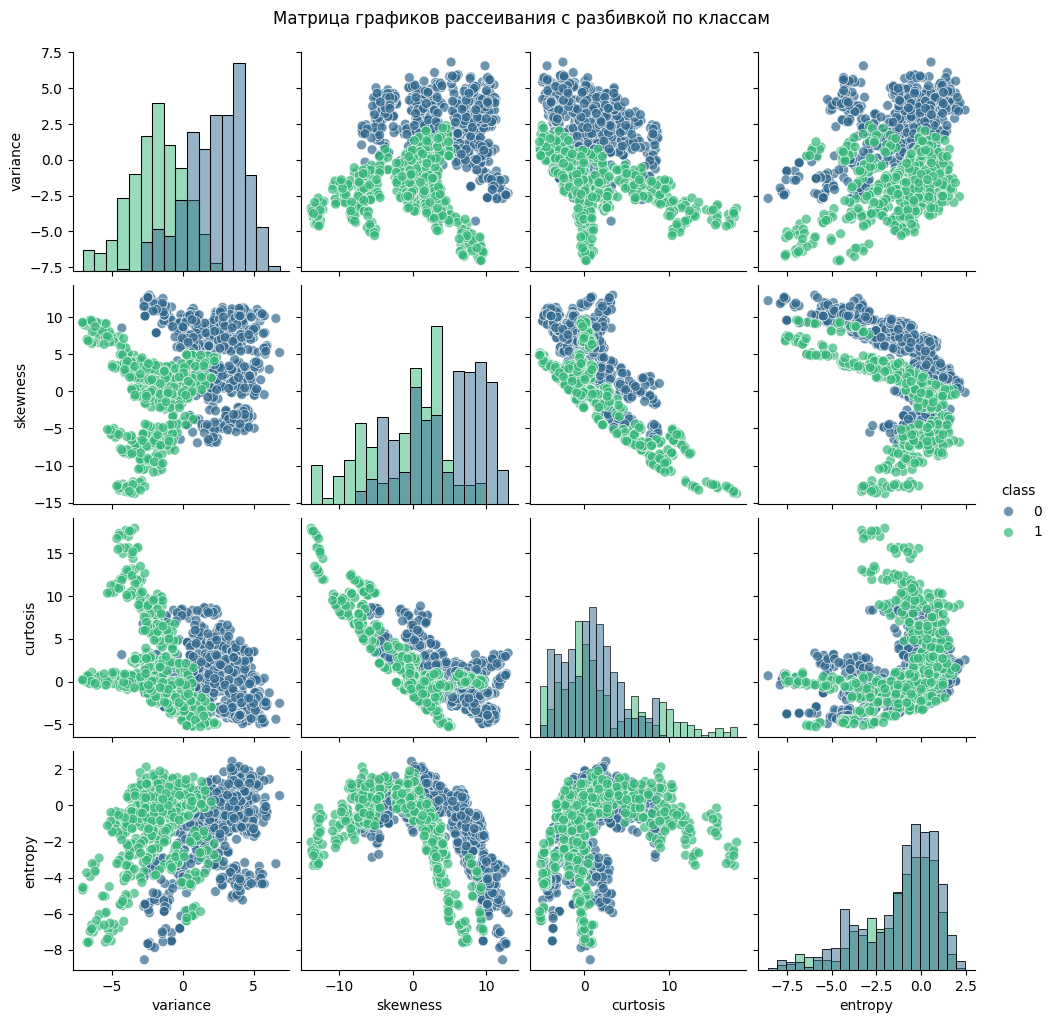

In [33]:
# 7. Матрица графиков рассеявания
print("\nМАТРИЦА:")
sns.pairplot(data, hue='class', diag_kind='hist',
             palette='viridis', plot_kws={'alpha': 0.7, 's': 50})
plt.suptitle('Матрица графиков рассеивания с разбивкой по классам', y=1.02)
plt.show()

In [35]:
print("АНАЛИЗ ПОЛУЧЕННЫХ РЕЗУЛЬТАТОВ:")
print("1. Корреляционный анализ показал:")
print("   - Наиболее сильная отрицательная корреляция между skewness и curtosis (-0.79)")
print("   - Остальные признаки слабо коррелированы между собой (<0.3)")

print("\n2. Визуальный анализ матрицы рассеивания показывает:")
print("   - Хорошее разделение классов 0 (настоящие) и 1 (поддельные) по признакам")
print("   - Некоторые признаки, например entropy, помогают лучше различать классы")
print("   - Выбросы присутствуют, но отражают реальные различия в изображениях банкнот")

print("\n3. Статистические характеристики:")
print("   - Все признаки числовые, распределение близкое к нормальному")
print("   - Пропущенных значений нет")
print("   - Данные чистые и готовы для машинного обучения")

print("\n4. Рекомендации для машинного обучения:")
print("   - Признаки практически не коррелируют, можно использовать все")
print("   - Данные идеальны для бинарной классификации")
print("   - Рекомендуемые алгоритмы: Logistic Regression, SVM, Random Forest, Gradient Boosting")


АНАЛИЗ ПОЛУЧЕННЫХ РЕЗУЛЬТАТОВ:
1. Корреляционный анализ показал:
   - Наиболее сильная отрицательная корреляция между skewness и curtosis (-0.79)
   - Остальные признаки слабо коррелированы между собой (<0.3)

2. Визуальный анализ матрицы рассеивания показывает:
   - Хорошее разделение классов 0 (настоящие) и 1 (поддельные) по признакам
   - Некоторые признаки, например entropy, помогают лучше различать классы
   - Выбросы присутствуют, но отражают реальные различия в изображениях банкнот

3. Статистические характеристики:
   - Все признаки числовые, распределение близкое к нормальному
   - Пропущенных значений нет
   - Данные чистые и готовы для машинного обучения

4. Рекомендации для машинного обучения:
   - Признаки практически не коррелируют, можно использовать все
   - Данные идеальны для бинарной классификации
   - Рекомендуемые алгоритмы: Logistic Regression, SVM, Random Forest, Gradient Boosting


In [36]:
print("\nВЫВОДЫ:")
print("1. Датасет Banknote Authentication представляет собой аккуратно структурированный набор данных с числовыми признаками")
print("2. Признаки демонстрируют разную степень взаимосвязи:")
print("   - Наиболее заметная отрицательная корреляция наблюдается между skewness и curtosis")
print("   - Остальные параметры практически независимы друг от друга")
print("3. Классы банкнот (подлинные и фальшивые) хорошо различимы по признакам, что облегчает классификацию")
print("4. Данные полностью подготовлены для использования в задачах машинного обучения без дополнительной предобработки")
print("5. Набор пригоден для демонстрации работы алгоритмов бинарной классификации и оценки эффективности моделей")



ВЫВОДЫ:
1. Датасет Banknote Authentication представляет собой аккуратно структурированный набор данных с числовыми признаками
2. Признаки демонстрируют разную степень взаимосвязи:
   - Наиболее заметная отрицательная корреляция наблюдается между skewness и curtosis
   - Остальные параметры практически независимы друг от друга
3. Классы банкнот (подлинные и фальшивые) хорошо различимы по признакам, что облегчает классификацию
4. Данные полностью подготовлены для использования в задачах машинного обучения без дополнительной предобработки
5. Набор пригоден для демонстрации работы алгоритмов бинарной классификации и оценки эффективности моделей
